# Generating Punks with a VAE & Labels

In [1]:
import sys
import os
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# Load pallets library

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from pallets import images as I, datasets as DS, models as M, logging as L


In [3]:
# To GPU, or not to GPU
device = M.get_device(require_gpu=True)

# Logging
L.init_logger()


<Logger pallets (INFO)>

## Prepare Datasets

In [4]:
all_colors = I.get_punk_colors()
mapper = DS.ColorOneHotMapper(all_colors)
dataset = DS.FastOneHotCPunksDataset(device, mapper, test_size=1000)
num_labels = len(dataset._labels[0])

INFO | loading punk images
INFO | - image 0
INFO | - image 1000
INFO | - image 2000
INFO | - image 3000
INFO | - image 4000
INFO | - image 5000
INFO | - image 6000
INFO | - image 7000
INFO | - image 8000
INFO | - image 9000
INFO | punk images complete
INFO | loading punk labels: ../../cpunks-10k/cpunks/data/punks.json


In [5]:
batch_size = 32
num_workers = 0

train_sampler = SubsetRandomSampler(dataset.train_idx)
test_sampler = SubsetRandomSampler(dataset.test_idx)

train_loader = DataLoader(
    dataset, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers
)
test_loader = DataLoader(
    dataset, batch_size=batch_size, sampler=test_sampler, num_workers=num_workers
)



## Training

In [6]:
# Cue training montage

model = M.vae.LabeledVAE(222, (64, 32), 20, num_labels)
criterion = M.vae.Loss()


train_losses, test_losses = M.vae.train(
    device, model, criterion, train_loader, test_loader,
    learn_rate=1e-03, epochs=50, with_labels=True
)


INFO | model: pallets.models.vae.LabeledVAE
INFO | criterion: pallets.models.vae.Loss
INFO | learn rate: 0.001
INFO | epochs: 50
INFO | epoch 1 (  0%) loss: 511768.625000
INFO | epoch 1 ( 35%) loss: 36696.694027
INFO | epoch 1 ( 70%) loss: 20477.250170
INFO | epoch 1 (100%) loss: 15670.404504
INFO | epoch 1 (test) loss: 3395.722692
INFO | epoch 2 (  0%) loss: 3634.620361
INFO | epoch 2 ( 35%) loss: 3290.567767
INFO | epoch 2 ( 70%) loss: 3158.406150
INFO | epoch 2 (100%) loss: 3043.573456
INFO | epoch 2 (test) loss: 2667.232544
INFO | epoch 3 (  0%) loss: 2728.961182
INFO | epoch 3 ( 35%) loss: 2633.309580
INFO | epoch 3 ( 70%) loss: 2560.730741
INFO | epoch 3 (100%) loss: 2504.972910
INFO | epoch 3 (test) loss: 2327.997801
INFO | epoch 4 (  0%) loss: 2327.551270
INFO | epoch 4 ( 35%) loss: 2321.568886
INFO | epoch 4 ( 70%) loss: 2270.441075
INFO | epoch 4 (100%) loss: 2233.951571
INFO | epoch 4 (test) loss: 2095.894856
INFO | epoch 5 (  0%) loss: 2101.103027
INFO | epoch 5 ( 35%) loss

In [7]:
M.save('vae.conv.labels', model, train_losses, test_losses)


INFO | model blob saved to /home/jmsdnns/ML/pallets/saved/vae.conv.labels.pkl
INFO | training losses saved to /home/jmsdnns/ML/pallets/saved/vae.conv.labels.json


## Generate punk with specific features

In [ ]:
# model, train_losses, test_losses = M.load('vae.conv.labels')

torch.Size([1, 222, 24, 24])
torch.Size([222, 24, 24])
torch.Size([4, 24, 24])


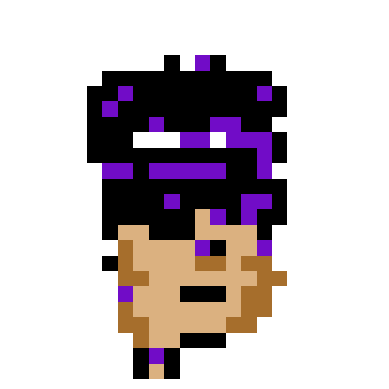

In [8]:

z = torch.randn(1, 20 + num_labels).to(device)

with torch.no_grad():
    model.eval()
    generated_image = model.decode(z)
    print(generated_image.shape)


decoded_one_hot = generated_image[0]
print(decoded_one_hot.shape)

decoded = DS.one_hot_to_rgba(decoded_one_hot, mapper)
print(decoded.shape)

plt.imshow(transforms.functional.to_pil_image(decoded))
plt.axis('off')
plt.show()


In [9]:
import json
ps_labels = json.load(open("../../cpunks-10k/cpunks/data/punks.json"))
label_keys = [k for k in ps_labels["0"].keys()]
_, test_labels = next(iter(train_loader))
features = test_labels[2]

enabled_features = [k for k,v in zip(label_keys, features) if v.item() == 1]

print(f"Features: {enabled_features}")


Features: ['male', 'chinstrap', 'mohawkDark', 'earring']


torch.Size([1, 222, 24, 24])
torch.Size([222, 24, 24])
torch.Size([4, 24, 24])


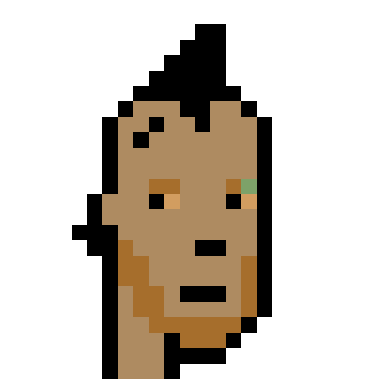

In [10]:
# Generate new image

z = torch.randn(1, 20).to(device)
z = torch.concat([z, features.unsqueeze(0)], dim=1)

with torch.no_grad():
    model.eval()
    generated_image = model.decode(z)
    print(generated_image.shape)


decoded_one_hot = generated_image[0]
print(decoded_one_hot.shape)

decoded = DS.one_hot_to_rgba(decoded_one_hot, mapper)
print(decoded.shape)

plt.imshow(transforms.functional.to_pil_image(decoded))
plt.axis('off')
plt.show()


In [11]:
train_losses


[31340.809007577016,
 6087.146912486841,
 5009.945820260556,
 4467.903141968639,
 4076.982081852906,
 3840.266645715592,
 3410.6006303070285,
 2756.739790679715,
 2240.906848447543,
 2134.2375886524824,
 2071.0675754411845,
 2033.6664284780516,
 2006.1057805271014,
 1976.425220678884,
 1967.8622217922345,
 1953.0648582945478,
 1943.602616113974,
 1934.0906734601826,
 1916.8608517477699,
 1917.3703426063485,
 1914.2826910357103,
 1910.7983199315713,
 1909.0312361480496,
 1902.7642048504335,
 1895.183549813345,
 1892.0261736930686,
 1901.7691190462585,
 1888.2974098151458,
 1889.491710906333,
 1889.9662397668717,
 1889.630522599457,
 1885.9759369978667,
 1886.808636820908,
 1885.7324835594663,
 1893.182535590855,
 1877.1644507874835,
 1877.824998679736,
 1879.3445774375969,
 1870.3908081054688,
 1874.6543034763201,
 1869.3775329589844,
 1868.5067760927457,
 1869.073137864999,
 1869.7823884571699,
 1869.6497438579586,
 1871.6292464885305,
 1870.020124394843,
 1870.0366370018492,
 1864.699

In [12]:
test_losses


[6791.445384979248,
 5334.465087890625,
 4655.995601654053,
 4191.789712905884,
 3836.0071029663086,
 3651.4808387756348,
 3044.626365661621,
 2265.789628982544,
 2078.1773738861084,
 2006.1445846557617,
 1952.501787185669,
 1927.353123664856,
 1889.3158855438232,
 1874.2402439117432,
 1852.192481994629,
 1855.340916633606,
 1845.1880226135254,
 1858.3696365356445,
 1816.4932403564453,
 1823.2833099365234,
 1806.775640487671,
 1839.403699874878,
 1807.9197101593018,
 1793.7403573989868,
 1800.9258880615234,
 1795.2082347869873,
 1812.4733581542969,
 1790.8224048614502,
 1780.8318967819214,
 1780.852970123291,
 1784.0331993103027,
 1787.2297897338867,
 1799.5952939987183,
 1801.7531833648682,
 1775.5332231521606,
 1769.9730625152588,
 1778.9719429016113,
 1769.039300918579,
 1761.585521697998,
 1770.9952754974365,
 1766.039743423462,
 1767.3117122650146,
 1782.3132362365723,
 1765.104658126831,
 1780.4391031265259,
 1768.2068309783936,
 1769.8943252563477,
 1779.9053478240967,
 1751.697

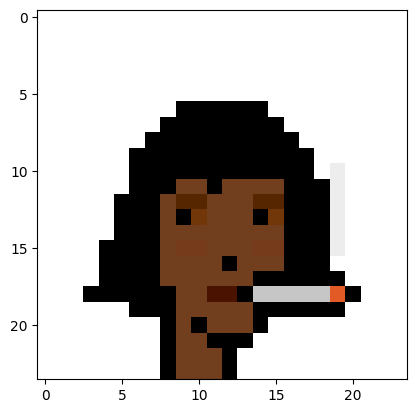

In [13]:
punk = I.get_punk_tensor(1000)

plt.imshow(transforms.functional.to_pil_image(punk))
plt.show()



In [14]:
ps_labels = json.load(open("../../cpunks-10k/cpunks/data/punks.json"))
punk_labels = torch.tensor([v for _,v in ps_labels["1000"].items()])
punk_labels = punk_labels.unsqueeze(0)
punk_labels = punk_labels.to(device)


torch.Size([1, 222, 24, 24])


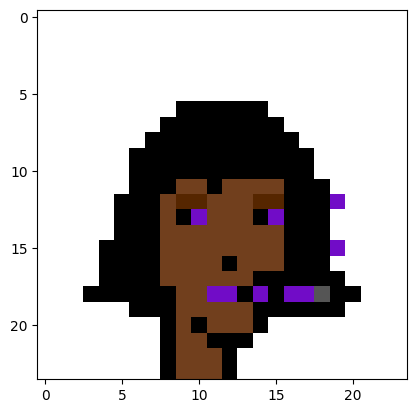

In [15]:
punk = I.get_punk_tensor(1000)

p = DS.rgba_to_one_hot(punk, mapper)
p = p.unsqueeze(0)
p = p.to(device)

model.eval()
with torch.no_grad():
    reconstructed, mu, logcar = model.forward(p, punk_labels)
    print(reconstructed.shape)

recon_punk = reconstructed[0].cpu()
recon_punk = DS.one_hot_to_rgba(recon_punk, mapper)
plt.imshow(transforms.functional.to_pil_image(recon_punk.cpu()))
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

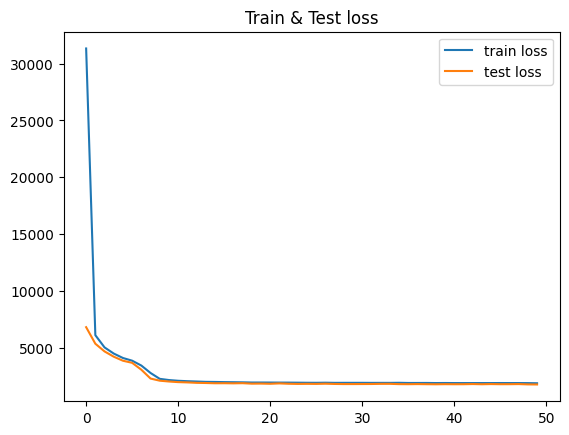

In [16]:
plt.title("Train & Test loss")
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show
